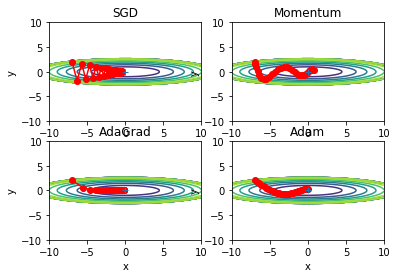

In [11]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

In [2]:
import numpy as np

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


In [3]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [4]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


In [5]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


===========iteration:0===========
SGD:2.3285435292762484
Momentum:2.310829040790738
AdaGrad:1.986692067182874
Adam:2.2428670533579687
===========iteration:100===========
SGD:1.5709690954318152
Momentum:0.4314893627298451
AdaGrad:0.17469822894424367
Adam:0.2376422406230631
===========iteration:200===========
SGD:0.8543974924174345
Momentum:0.28626263631120863
AdaGrad:0.11728781748220068
Adam:0.18119181501522924
===========iteration:300===========
SGD:0.6013417841954661
Momentum:0.1979457674184636
AdaGrad:0.0889255614620483
Adam:0.14606809341673582
===========iteration:400===========
SGD:0.39155467124243654
Momentum:0.15993137321617373
AdaGrad:0.05334648312464699
Adam:0.1137314604620183
===========iteration:500===========
SGD:0.340340694936806
Momentum:0.13691749272726286
AdaGrad:0.08450430461990494
Adam:0.08063184316537632
===========iteration:600===========
SGD:0.33950247982677273
Momentum:0.1547085159643082
AdaGrad:0.03876901150455282
Adam:0.1149981018725683
===========iteration:700==

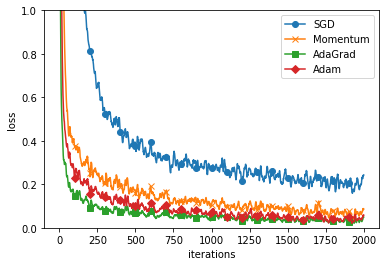

In [7]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

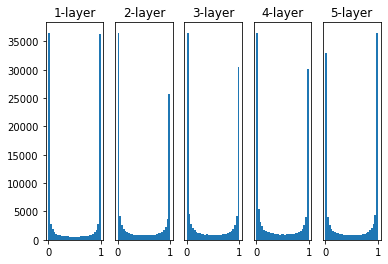

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302551247050671
Xavier:2.310406426741185
He:2.370053115811102
===========iteration:100===========
std=0.01:2.302357629343401
Xavier:2.270895297846436
He:1.2054701789574762
===========iteration:200===========
std=0.01:2.3027625736896056
Xavier:2.218297414267479
He:0.6882751101261833
===========iteration:300===========
std=0.01:2.300241375225707
Xavier:2.0646471705680742
He:0.38539149592312427
===========iteration:400===========
std=0.01:2.2999325363239587
Xavier:1.815366019618518
He:0.3733334931813044
===========iteration:500===========
std=0.01:2.301285669729484
Xavier:1.3426129401336204
He:0.4131734926535652
===========iteration:600===========
std=0.01:2.3000778346270803
Xavier:0.9380493672356244
He:0.34005438035139873
===========iteration:700===========
std=0.01:2.296685345959146
Xavier:0.6971457536361751
He:0.31946020696072586
===========iteration:800===========
std=0.01:2.2976934898934003
Xavier:0.4984243852617785
He:0.21330165280780689


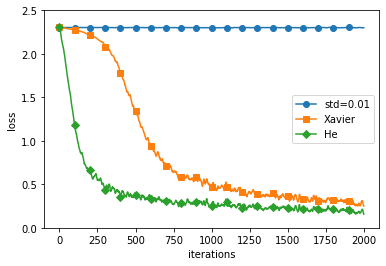

In [9]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.092 - 0.072


C:\Users\송혜경\Desktop\딥러닝 Study\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.096
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.134
epoch:4 | 0.097 - 0.156
epoch:5 | 0.097 - 0.164
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.199
epoch:8 | 0.097 - 0.218
epoch:9 | 0.097 - 0.234
epoch:10 | 0.097 - 0.247
epoch:11 | 0.097 - 0.269
epoch:12 | 0.097 - 0.295
epoch:13 | 0.097 - 0.316
epoch:14 | 0.097 - 0.339
epoch:15 | 0.097 - 0.354
epoch:16 | 0.097 - 0.356
epoch:17 | 0.097 - 0.376
epoch:18 | 0.097 - 0.381


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.405
============== 2/16 ==============
epoch:0 | 0.117 - 0.125


C:\Users\송혜경\Desktop\딥러닝 Study\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.09
epoch:2 | 0.097 - 0.102
epoch:3 | 0.097 - 0.114
epoch:4 | 0.097 - 0.14
epoch:5 | 0.097 - 0.166
epoch:6 | 0.097 - 0.205
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.265
epoch:9 | 0.097 - 0.289
epoch:10 | 0.097 - 0.309
epoch:11 | 0.097 - 0.336
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.378
epoch:14 | 0.097 - 0.411
epoch:15 | 0.097 - 0.417
epoch:16 | 0.097 - 0.445
epoch:17 | 0.097 - 0.45
epoch:18 | 0.097 - 0.471
epoch:19 | 0.097 - 0.491

No handles with labels found to put in legend.



============== 3/16 ==============
epoch:0 | 0.111 - 0.118
epoch:1 | 0.265 - 0.123
epoch:2 | 0.411 - 0.172
epoch:3 | 0.485 - 0.215
epoch:4 | 0.574 - 0.256
epoch:5 | 0.617 - 0.308
epoch:6 | 0.674 - 0.349
epoch:7 | 0.718 - 0.378
epoch:8 | 0.746 - 0.41
epoch:9 | 0.778 - 0.432
epoch:10 | 0.801 - 0.464
epoch:11 | 0.823 - 0.476
epoch:12 | 0.862 - 0.498
epoch:13 | 0.868 - 0.524
epoch:14 | 0.877 - 0.544
epoch:15 | 0.897 - 0.572
epoch:16 | 0.915 - 0.6
epoch:17 | 0.931 - 0.62
epoch:18 | 0.933 - 0.644


No handles with labels found to put in legend.


epoch:19 | 0.944 - 0.656
============== 4/16 ==============
epoch:0 | 0.117 - 0.096
epoch:1 | 0.245 - 0.113
epoch:2 | 0.372 - 0.199
epoch:3 | 0.478 - 0.284
epoch:4 | 0.56 - 0.341
epoch:5 | 0.607 - 0.41
epoch:6 | 0.644 - 0.451
epoch:7 | 0.681 - 0.495
epoch:8 | 0.703 - 0.545
epoch:9 | 0.734 - 0.567
epoch:10 | 0.744 - 0.609
epoch:11 | 0.771 - 0.644
epoch:12 | 0.782 - 0.677
epoch:13 | 0.783 - 0.692
epoch:14 | 0.799 - 0.709
epoch:15 | 0.81 - 0.732
epoch:16 | 0.824 - 0.745
epoch:17 | 0.83 - 0.766
epoch:18 | 0.835 - 0.781


No handles with labels found to put in legend.


epoch:19 | 0.844 - 0.793
============== 5/16 ==============
epoch:0 | 0.09 - 0.105
epoch:1 | 0.1 - 0.116
epoch:2 | 0.107 - 0.284
epoch:3 | 0.114 - 0.421
epoch:4 | 0.116 - 0.502
epoch:5 | 0.125 - 0.55
epoch:6 | 0.128 - 0.592
epoch:7 | 0.136 - 0.646
epoch:8 | 0.14 - 0.679
epoch:9 | 0.146 - 0.71
epoch:10 | 0.143 - 0.741
epoch:11 | 0.155 - 0.763
epoch:12 | 0.171 - 0.778
epoch:13 | 0.171 - 0.799
epoch:14 | 0.18 - 0.813
epoch:15 | 0.193 - 0.826
epoch:16 | 0.2 - 0.839
epoch:17 | 0.212 - 0.854
epoch:18 | 0.23 - 0.869


No handles with labels found to put in legend.


epoch:19 | 0.237 - 0.87
============== 6/16 ==============
epoch:0 | 0.154 - 0.098
epoch:1 | 0.119 - 0.158
epoch:2 | 0.116 - 0.436
epoch:3 | 0.107 - 0.614
epoch:4 | 0.116 - 0.677
epoch:5 | 0.116 - 0.718
epoch:6 | 0.109 - 0.758
epoch:7 | 0.108 - 0.786
epoch:8 | 0.117 - 0.831
epoch:9 | 0.117 - 0.848
epoch:10 | 0.117 - 0.867
epoch:11 | 0.117 - 0.879
epoch:12 | 0.117 - 0.893
epoch:13 | 0.14 - 0.907
epoch:14 | 0.136 - 0.922
epoch:15 | 0.164 - 0.932
epoch:16 | 0.117 - 0.944
epoch:17 | 0.116 - 0.952
epoch:18 | 0.117 - 0.952
epoch:19 | 0.116 - 0.956

No handles with labels found to put in legend.



============== 7/16 ==============
epoch:0 | 0.117 - 0.098
epoch:1 | 0.117 - 0.201
epoch:2 | 0.116 - 0.607
epoch:3 | 0.116 - 0.724
epoch:4 | 0.116 - 0.764
epoch:5 | 0.116 - 0.805
epoch:6 | 0.116 - 0.832
epoch:7 | 0.117 - 0.86
epoch:8 | 0.116 - 0.885
epoch:9 | 0.117 - 0.902
epoch:10 | 0.116 - 0.909
epoch:11 | 0.116 - 0.928
epoch:12 | 0.116 - 0.934
epoch:13 | 0.117 - 0.955
epoch:14 | 0.117 - 0.962
epoch:15 | 0.117 - 0.978
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.983


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.097 - 0.122
epoch:1 | 0.116 - 0.339
epoch:2 | 0.116 - 0.592
epoch:3 | 0.116 - 0.683
epoch:4 | 0.116 - 0.748
epoch:5 | 0.116 - 0.829
epoch:6 | 0.116 - 0.88
epoch:7 | 0.116 - 0.925
epoch:8 | 0.116 - 0.946
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.975
epoch:11 | 0.116 - 0.985
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.992
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.995
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998
epoch:19 | 0.116 - 0.999

No handles with labels found to put in legend.



============== 9/16 ==============
epoch:0 | 0.116 - 0.115
epoch:1 | 0.116 - 0.581
epoch:2 | 0.117 - 0.719
epoch:3 | 0.117 - 0.789
epoch:4 | 0.117 - 0.857
epoch:5 | 0.117 - 0.91
epoch:6 | 0.117 - 0.948
epoch:7 | 0.117 - 0.971
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.099 - 0.187
epoch:1 | 0.099 - 0.563
epoch:2 | 0.116 - 0.762
epoch:3 | 0.116 - 0.847
epoch:4 | 0.116 - 0.902
epoch:5 | 0.116 - 0.919
epoch:6 | 0.116 - 0.957
epoch:7 | 0.116 - 0.974
epoch:8 | 0.116 - 0.984
epoch:9 | 0.116 - 0.995
epoch:10 | 0.116 - 0.991
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.998
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 1.0
epoch:15 | 0.116 - 1.0
epoch:16 | 0.116 - 1.0
epoch:17 | 0.116 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0

No handles with labels found to put in legend.



============== 11/16 ==============
epoch:0 | 0.105 - 0.156
epoch:1 | 0.116 - 0.25
epoch:2 | 0.116 - 0.746
epoch:3 | 0.116 - 0.74
epoch:4 | 0.116 - 0.666
epoch:5 | 0.117 - 0.821
epoch:6 | 0.117 - 0.874
epoch:7 | 0.117 - 0.929
epoch:8 | 0.116 - 0.959
epoch:9 | 0.116 - 0.972
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.988
epoch:12 | 0.116 - 0.991
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.965
epoch:16 | 0.116 - 0.885
epoch:17 | 0.116 - 0.934
epoch:18 | 0.116 - 0.99


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.994
============== 12/16 ==============
epoch:0 | 0.116 - 0.276
epoch:1 | 0.117 - 0.596
epoch:2 | 0.116 - 0.614
epoch:3 | 0.117 - 0.705
epoch:4 | 0.117 - 0.754
epoch:5 | 0.117 - 0.769
epoch:6 | 0.117 - 0.777
epoch:7 | 0.117 - 0.782
epoch:8 | 0.116 - 0.777
epoch:9 | 0.116 - 0.79
epoch:10 | 0.116 - 0.792
epoch:11 | 0.117 - 0.793
epoch:12 | 0.117 - 0.877
epoch:13 | 0.117 - 0.853
epoch:14 | 0.117 - 0.889
epoch:15 | 0.117 - 0.96
epoch:16 | 0.117 - 0.986
epoch:17 | 0.117 - 0.987
epoch:18 | 0.117 - 0.991
epoch:19 | 0.117 - 0.991

No handles with labels found to put in legend.



============== 13/16 ==============
epoch:0 | 0.1 - 0.16
epoch:1 | 0.117 - 0.375
epoch:2 | 0.117 - 0.579
epoch:3 | 0.117 - 0.61
epoch:4 | 0.117 - 0.627
epoch:5 | 0.117 - 0.653
epoch:6 | 0.117 - 0.636
epoch:7 | 0.117 - 0.665
epoch:8 | 0.117 - 0.685
epoch:9 | 0.117 - 0.701
epoch:10 | 0.117 - 0.705
epoch:11 | 0.117 - 0.74
epoch:12 | 0.117 - 0.731
epoch:13 | 0.117 - 0.724
epoch:14 | 0.117 - 0.697
epoch:15 | 0.117 - 0.695
epoch:16 | 0.117 - 0.672
epoch:17 | 0.117 - 0.689
epoch:18 | 0.117 - 0.692
epoch:19 | 0.117 - 0.697


No handles with labels found to put in legend.


============== 14/16 ==============
epoch:0 | 0.116 - 0.226
epoch:1 | 0.117 - 0.305
epoch:2 | 0.116 - 0.397
epoch:3 | 0.116 - 0.424
epoch:4 | 0.117 - 0.421
epoch:5 | 0.117 - 0.398
epoch:6 | 0.117 - 0.429
epoch:7 | 0.117 - 0.402
epoch:8 | 0.117 - 0.441
epoch:9 | 0.117 - 0.498
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.52
epoch:13 | 0.117 - 0.516
epoch:14 | 0.117 - 0.502
epoch:15 | 0.117 - 0.529
epoch:16 | 0.117 - 0.517
epoch:17 | 0.117 - 0.523
epoch:18 | 0.117 - 0.522
epoch:19 | 0.117 - 0.53


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.117 - 0.135
epoch:1 | 0.117 - 0.296
epoch:2 | 0.117 - 0.397
epoch:3 | 0.117 - 0.411
epoch:4 | 0.117 - 0.414
epoch:5 | 0.117 - 0.476
epoch:6 | 0.117 - 0.481
epoch:7 | 0.117 - 0.486
epoch:8 | 0.117 - 0.495
epoch:9 | 0.117 - 0.512
epoch:10 | 0.117 - 0.513
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.514
epoch:13 | 0.117 - 0.513
epoch:14 | 0.117 - 0.513
epoch:15 | 0.117 - 0.52
epoch:16 | 0.117 - 0.52
epoch:17 | 0.117 - 0.517
epoch:18 | 0.117 - 0.517
epoch:19 | 0.117 - 0.521


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.117 - 0.177
epoch:2 | 0.117 - 0.286
epoch:3 | 0.117 - 0.293
epoch:4 | 0.117 - 0.324
epoch:5 | 0.117 - 0.329
epoch:6 | 0.117 - 0.328
epoch:7 | 0.117 - 0.329
epoch:8 | 0.117 - 0.33
epoch:9 | 0.117 - 0.333
epoch:10 | 0.117 - 0.331
epoch:11 | 0.117 - 0.398
epoch:12 | 0.117 - 0.418
epoch:13 | 0.117 - 0.428
epoch:14 | 0.117 - 0.374
epoch:15 | 0.117 - 0.402
epoch:16 | 0.117 - 0.433
epoch:17 | 0.117 - 0.423
epoch:18 | 0.117 - 0.51
epoch:19 | 0.117 - 0.496


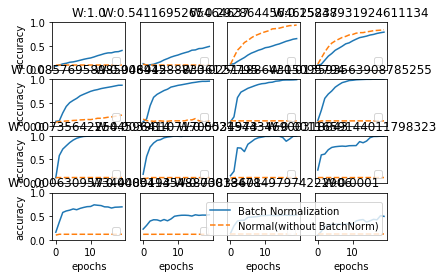

In [13]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.1, test acc:0.0811
epoch:1, train acc:0.12333333333333334, test acc:0.0985
epoch:2, train acc:0.13666666666666666, test acc:0.1148
epoch:3, train acc:0.18, test acc:0.1326
epoch:4, train acc:0.20333333333333334, test acc:0.1439
epoch:5, train acc:0.25666666666666665, test acc:0.1678
epoch:6, train acc:0.29, test acc:0.1834
epoch:7, train acc:0.3, test acc:0.2051
epoch:8, train acc:0.32, test acc:0.2173
epoch:9, train acc:0.32666666666666666, test acc:0.2272
epoch:10, train acc:0.36333333333333334, test acc:0.2469
epoch:11, train acc:0.38333333333333336, test acc:0.26
epoch:12, train acc:0.3933333333333333, test acc:0.2704
epoch:13, train acc:0.37666666666666665, test acc:0.2666
epoch:14, train acc:0.4066666666666667, test acc:0.2882
epoch:15, train acc:0.4266666666666667, test acc:0.2968
epoch:16, train acc:0.44666666666666666, test acc:0.3052
epoch:17, train acc:0.44666666666666666, test acc:0.3103
epoch:18, train acc:0.45, test acc:0.3123
epoch:19, train acc:0.46

epoch:162, train acc:0.8966666666666666, test acc:0.7149
epoch:163, train acc:0.8866666666666667, test acc:0.7158
epoch:164, train acc:0.9, test acc:0.7114
epoch:165, train acc:0.8833333333333333, test acc:0.7068
epoch:166, train acc:0.89, test acc:0.7087
epoch:167, train acc:0.8633333333333333, test acc:0.694
epoch:168, train acc:0.87, test acc:0.704
epoch:169, train acc:0.8933333333333333, test acc:0.7068
epoch:170, train acc:0.8933333333333333, test acc:0.7121
epoch:171, train acc:0.8933333333333333, test acc:0.7135
epoch:172, train acc:0.8833333333333333, test acc:0.7062
epoch:173, train acc:0.88, test acc:0.7031
epoch:174, train acc:0.9, test acc:0.7057
epoch:175, train acc:0.9066666666666666, test acc:0.711
epoch:176, train acc:0.8766666666666667, test acc:0.7006
epoch:177, train acc:0.8966666666666666, test acc:0.7137
epoch:178, train acc:0.89, test acc:0.7145
epoch:179, train acc:0.8966666666666666, test acc:0.7071
epoch:180, train acc:0.9033333333333333, test acc:0.7169
epoch:

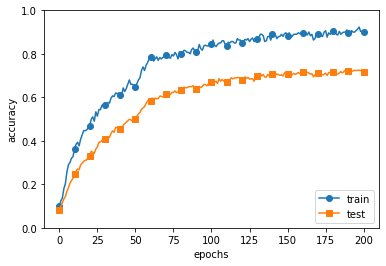

In [14]:
#일부러 오버피팅을 일으킨 후 가중치 감소(weight_decay)의 효과를 관찰합니다.
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.3366485589224957
=== epoch:1, train acc:0.09, test acc:0.0937 ===
train loss:2.3375445046066288
train loss:2.316858042738088
train loss:2.3334476191393674
=== epoch:2, train acc:0.08666666666666667, test acc:0.0947 ===
train loss:2.3293938190007206
train loss:2.323718400352459
train loss:2.339128138979352
=== epoch:3, train acc:0.08333333333333333, test acc:0.095 ===
train loss:2.3137296249785555
train loss:2.315794875319437
train loss:2.316995509890552
=== epoch:4, train acc:0.08333333333333333, test acc:0.0958 ===
train loss:2.325701670491909
train loss:2.332130771049444
train loss:2.307473799680098
=== epoch:5, train acc:0.08333333333333333, test acc:0.0955 ===
train loss:2.335242830534658
train loss:2.305422589220653
train loss:2.3108956650335206
=== epoch:6, train acc:0.08666666666666667, test acc:0.0956 ===
train loss:2.3157671691552455
train loss:2.326023407479706
train loss:2.320875182761615
=== epoch:7, train acc:0.08666666666666667, test acc:0.094 ===
train loss:

=== epoch:56, train acc:0.2866666666666667, test acc:0.2428 ===
train loss:2.24981166062405
train loss:2.256572276794397
train loss:2.258101184830319
=== epoch:57, train acc:0.2866666666666667, test acc:0.2408 ===
train loss:2.2644269074812295
train loss:2.252603641338654
train loss:2.2542992422998664
=== epoch:58, train acc:0.2966666666666667, test acc:0.243 ===
train loss:2.2635379489472514
train loss:2.2612785069001817
train loss:2.2567132999749235
=== epoch:59, train acc:0.3, test acc:0.2456 ===
train loss:2.262579242124995
train loss:2.2460146637214695
train loss:2.2599883924925566
=== epoch:60, train acc:0.3, test acc:0.2468 ===
train loss:2.2493795647802504
train loss:2.256120139705247
train loss:2.2422571534792497
=== epoch:61, train acc:0.29333333333333333, test acc:0.2451 ===
train loss:2.2549630290102574
train loss:2.2477407807043996
train loss:2.253492588078906
=== epoch:62, train acc:0.2866666666666667, test acc:0.244 ===
train loss:2.243769298227871
train loss:2.262244738

=== epoch:112, train acc:0.3466666666666667, test acc:0.2738 ===
train loss:2.143588188783236
train loss:2.1718752087302584
train loss:2.1987650974619926
=== epoch:113, train acc:0.3466666666666667, test acc:0.2763 ===
train loss:2.184562372296421
train loss:2.113531967914981
train loss:2.164651349299018
=== epoch:114, train acc:0.35, test acc:0.2786 ===
train loss:2.174832642938546
train loss:2.1231167159240725
train loss:2.1769200717643966
=== epoch:115, train acc:0.35333333333333333, test acc:0.2797 ===
train loss:2.229711596538196
train loss:2.1472098286664236
train loss:2.190015431521178
=== epoch:116, train acc:0.35333333333333333, test acc:0.2844 ===
train loss:2.1462673223967075
train loss:2.144604200279913
train loss:2.131751476152223
=== epoch:117, train acc:0.35333333333333333, test acc:0.2808 ===
train loss:2.1072350165635307
train loss:2.1283028383621763
train loss:2.136418127585844
=== epoch:118, train acc:0.35333333333333333, test acc:0.2806 ===
train loss:2.159005390519

=== epoch:168, train acc:0.43333333333333335, test acc:0.3573 ===
train loss:2.0146993590833553
train loss:2.033749558547195
train loss:1.9723336779925114
=== epoch:169, train acc:0.43333333333333335, test acc:0.3615 ===
train loss:1.9839394280339793
train loss:1.9380171768272692
train loss:2.018497901153491
=== epoch:170, train acc:0.44, test acc:0.366 ===
train loss:2.0379167365919844
train loss:1.9845355322687694
train loss:1.9584603192201113
=== epoch:171, train acc:0.44, test acc:0.3667 ===
train loss:2.0423827523230837
train loss:2.001762598476338
train loss:2.039394175969052
=== epoch:172, train acc:0.44, test acc:0.3669 ===
train loss:1.9513989237095604
train loss:1.8895296757100395
train loss:2.016284248379988
=== epoch:173, train acc:0.44, test acc:0.3666 ===
train loss:1.9861832828080193
train loss:2.0199921833603502
train loss:1.9897106950227987
=== epoch:174, train acc:0.44333333333333336, test acc:0.3676 ===
train loss:2.0637552978175298
train loss:1.977058558295723
train

=== epoch:223, train acc:0.49666666666666665, test acc:0.4157 ===
train loss:1.8207403211063684
train loss:1.6809034233941538
train loss:1.7564160249107692
=== epoch:224, train acc:0.49666666666666665, test acc:0.4147 ===
train loss:1.792154545083266
train loss:1.8097593777429504
train loss:1.808986585357694
=== epoch:225, train acc:0.49666666666666665, test acc:0.4161 ===
train loss:1.7597876742930258
train loss:1.8194895944562008
train loss:1.8172258682201514
=== epoch:226, train acc:0.5, test acc:0.4181 ===
train loss:1.8874154842263766
train loss:1.749034284621942
train loss:1.7915345614390388
=== epoch:227, train acc:0.5033333333333333, test acc:0.42 ===
train loss:1.8018153385590299
train loss:1.792889621724124
train loss:1.8078176975410931
=== epoch:228, train acc:0.5033333333333333, test acc:0.4207 ===
train loss:1.666171780145178
train loss:1.7683576395406424
train loss:1.73349921477931
=== epoch:229, train acc:0.5, test acc:0.4163 ===
train loss:1.8754043369893
train loss:1.6

=== epoch:278, train acc:0.57, test acc:0.4643 ===
train loss:1.5269302876369288
train loss:1.5468960831481289
train loss:1.4827951086150584
=== epoch:279, train acc:0.5733333333333334, test acc:0.4688 ===
train loss:1.336643454361259
train loss:1.4807999725369134
train loss:1.5883262983009967
=== epoch:280, train acc:0.5733333333333334, test acc:0.4754 ===
train loss:1.5193238545422867
train loss:1.604412488050549
train loss:1.522295039860899
=== epoch:281, train acc:0.5766666666666667, test acc:0.4722 ===
train loss:1.6867282450171521
train loss:1.5336889574101336
train loss:1.5060171674750449
=== epoch:282, train acc:0.5733333333333334, test acc:0.4721 ===
train loss:1.5370125601394784
train loss:1.3666075670913531
train loss:1.3859946807446764
=== epoch:283, train acc:0.58, test acc:0.4703 ===
train loss:1.458658975063278
train loss:1.4386468531514536
train loss:1.629959342819389
=== epoch:284, train acc:0.5966666666666667, test acc:0.4711 ===
train loss:1.4967988970913957
train lo

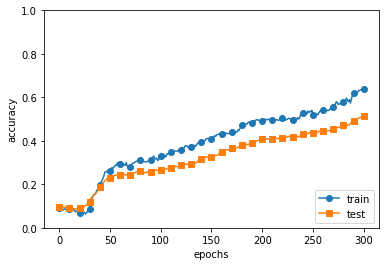

In [15]:
#일부러 오버피팅을 일으킨 후 드롭아웃(dropout)의 효과를 관찰합니다.

import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.77 | lr:0.009398161090337743, weight decay:4.2549891115043553e-05
val acc:0.14 | lr:2.3869363680021474e-06, weight decay:1.2297207769277197e-06
val acc:0.1 | lr:0.0002841156535541861, weight decay:7.745213322533607e-08
val acc:0.06 | lr:2.0437863299300066e-05, weight decay:5.227827036958291e-07
val acc:0.08 | lr:4.4410157099061756e-05, weight decay:2.906021175258631e-06
val acc:0.78 | lr:0.006900805434589423, weight decay:1.6207505272831178e-06
val acc:0.05 | lr:1.8551960618351699e-06, weight decay:1.2282507069158152e-08
val acc:0.1 | lr:0.00015805775641707364, weight decay:2.953564712868892e-08
val acc:0.58 | lr:0.0034807147993810585, weight decay:9.709770905602536e-07
val acc:0.07 | lr:2.422695189495247e-05, weight decay:1.6042440522691692e-05
val acc:0.07 | lr:1.2388623473619555e-05, weight decay:2.4920301009629557e-05
val acc:0.12 | lr:1.1277637716815178e-06, weight decay:7.59248843095206e-05
val acc:0.69 | lr:0.005154181299960751, weight decay:9.1711017917332e-07
val acc

Best-7(val acc:0.69) | lr:0.005154181299960751, weight decay:9.1711017917332e-07
Best-8(val acc:0.69) | lr:0.004660722950620274, weight decay:4.1567297429436153e-07
Best-9(val acc:0.69) | lr:0.005374846873660857, weight decay:7.298976339304701e-08
Best-10(val acc:0.68) | lr:0.004646617592421967, weight decay:7.691583294751131e-06
Best-11(val acc:0.67) | lr:0.004773288557992594, weight decay:3.4580633093526406e-05
Best-12(val acc:0.67) | lr:0.005819208307334465, weight decay:7.993879701698617e-05
Best-13(val acc:0.59) | lr:0.003193006111361037, weight decay:2.4795503006916804e-06
Best-14(val acc:0.59) | lr:0.003242556170107209, weight decay:1.8153991134724244e-06
Best-15(val acc:0.58) | lr:0.0034807147993810585, weight decay:9.709770905602536e-07
Best-16(val acc:0.56) | lr:0.002392644249310571, weight decay:8.119540952105426e-06
Best-17(val acc:0.49) | lr:0.003020302463005085, weight decay:3.8809936268555536e-08
Best-18(val acc:0.48) | lr:0.0035451901184834016, weight decay:2.2754586369

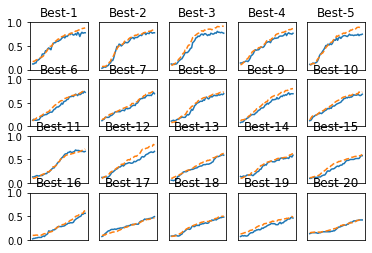

In [16]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()